# Mount Drive

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ROOT_DIR = '/content/drive/MyDrive/Traffic_sign detection'

# use pre-trained YOLO


In [5]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.4/660.4 kB 5.7 MB/s eta 0:00:00


In [6]:
import os
from ultralytics import YOLO

In [11]:
#Create yaml file
import yaml

# Create a configuration dictionary
config = {
   "path": "/content/drive/MyDrive/Traffic_sign detection/data",  # Path to the dataset images directory
   "train": "images",                   # Training data directory
   "val": "images",                       # Validation data directory
   "names": ["prohibitory","danger","mandatory","other"]  # Class names
}

# Write the configuration to a YAML file
with open("traffic_sign.yaml", "w") as file:
   yaml.dump(config, file, default_flow_style=False)


In [12]:
!cat traffic_sign.yaml

names:
- prohibitory
- danger
- mandatory
- other
path: /content/drive/MyDrive/Traffic_sign detection/data
train: images
val: images


In [9]:
#Load pre-trained model
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 99.4MB/s]


In [13]:
# Use the model
!yolo task=detect mode=train data=traffic_sign.yaml model=yolov8s.pt epochs=60 lr0=0.01  # train the model

Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=traffic_sign.yaml, epochs=60, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, k

# Display result

In [16]:
from IPython.display import Image, display

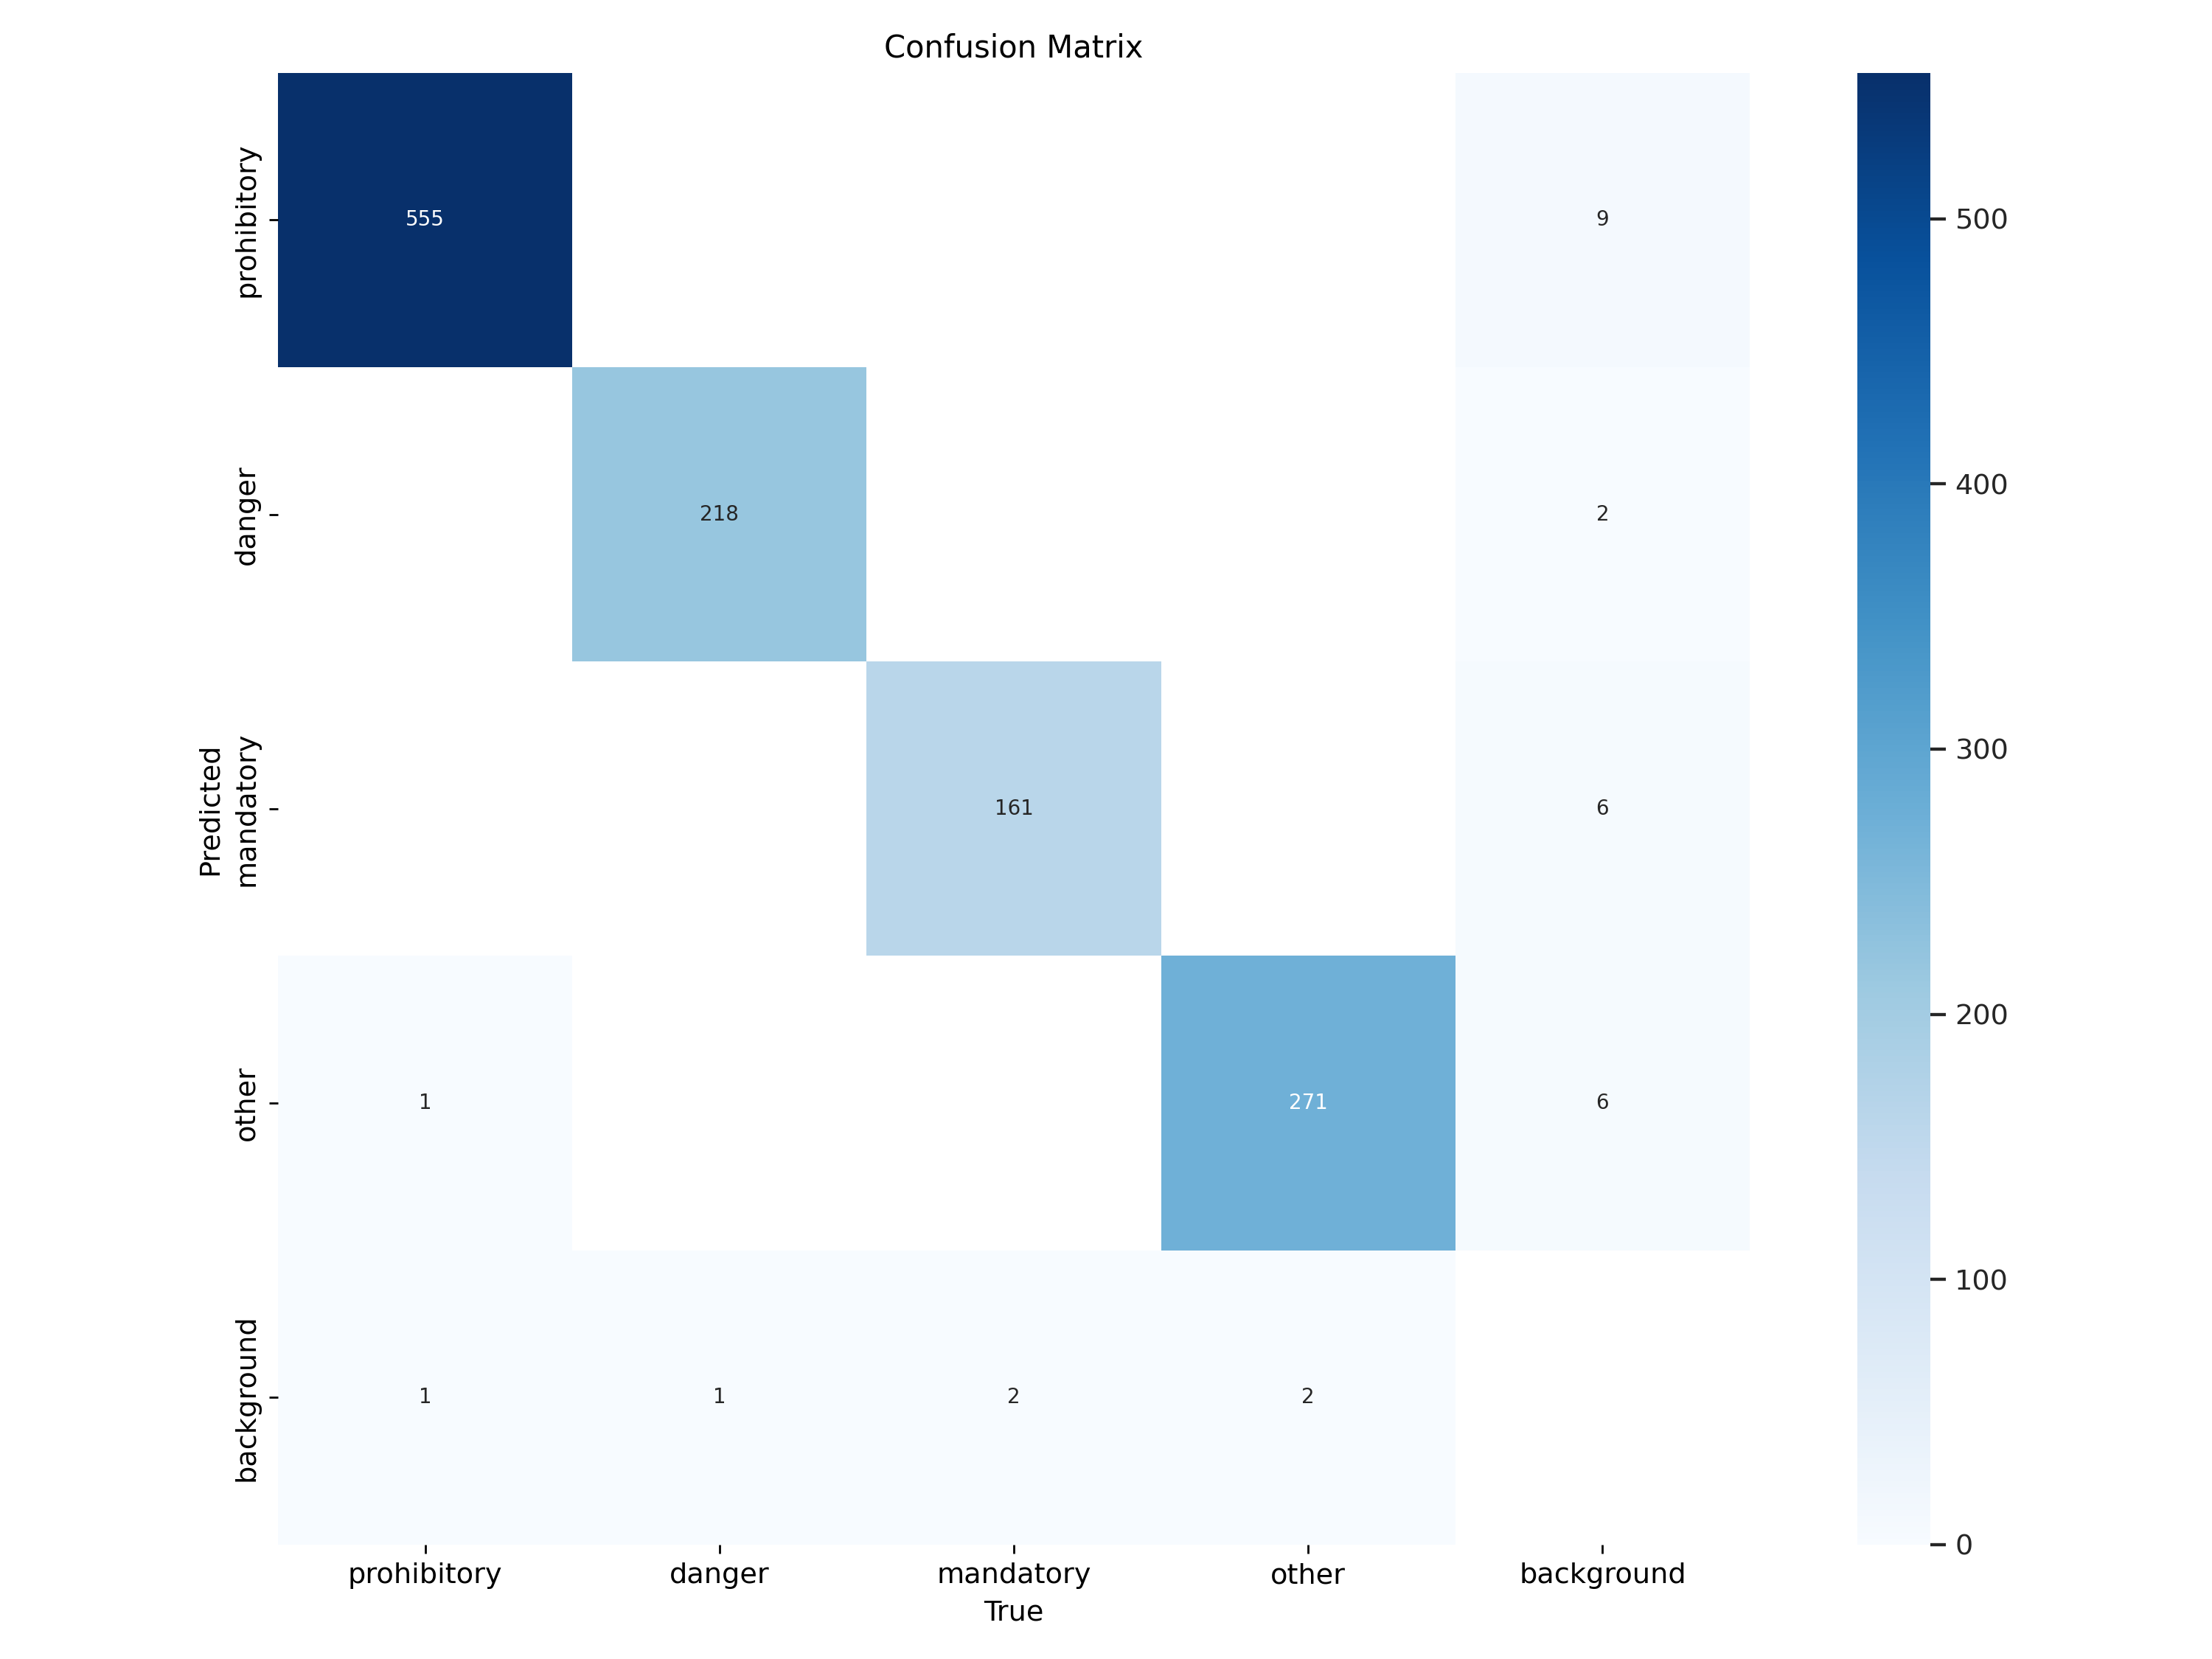

In [17]:
# Display confusion matrix
image_path = '/content/runs/detect/train2/confusion_matrix.png'

# Display the image
display(Image(filename=image_path))

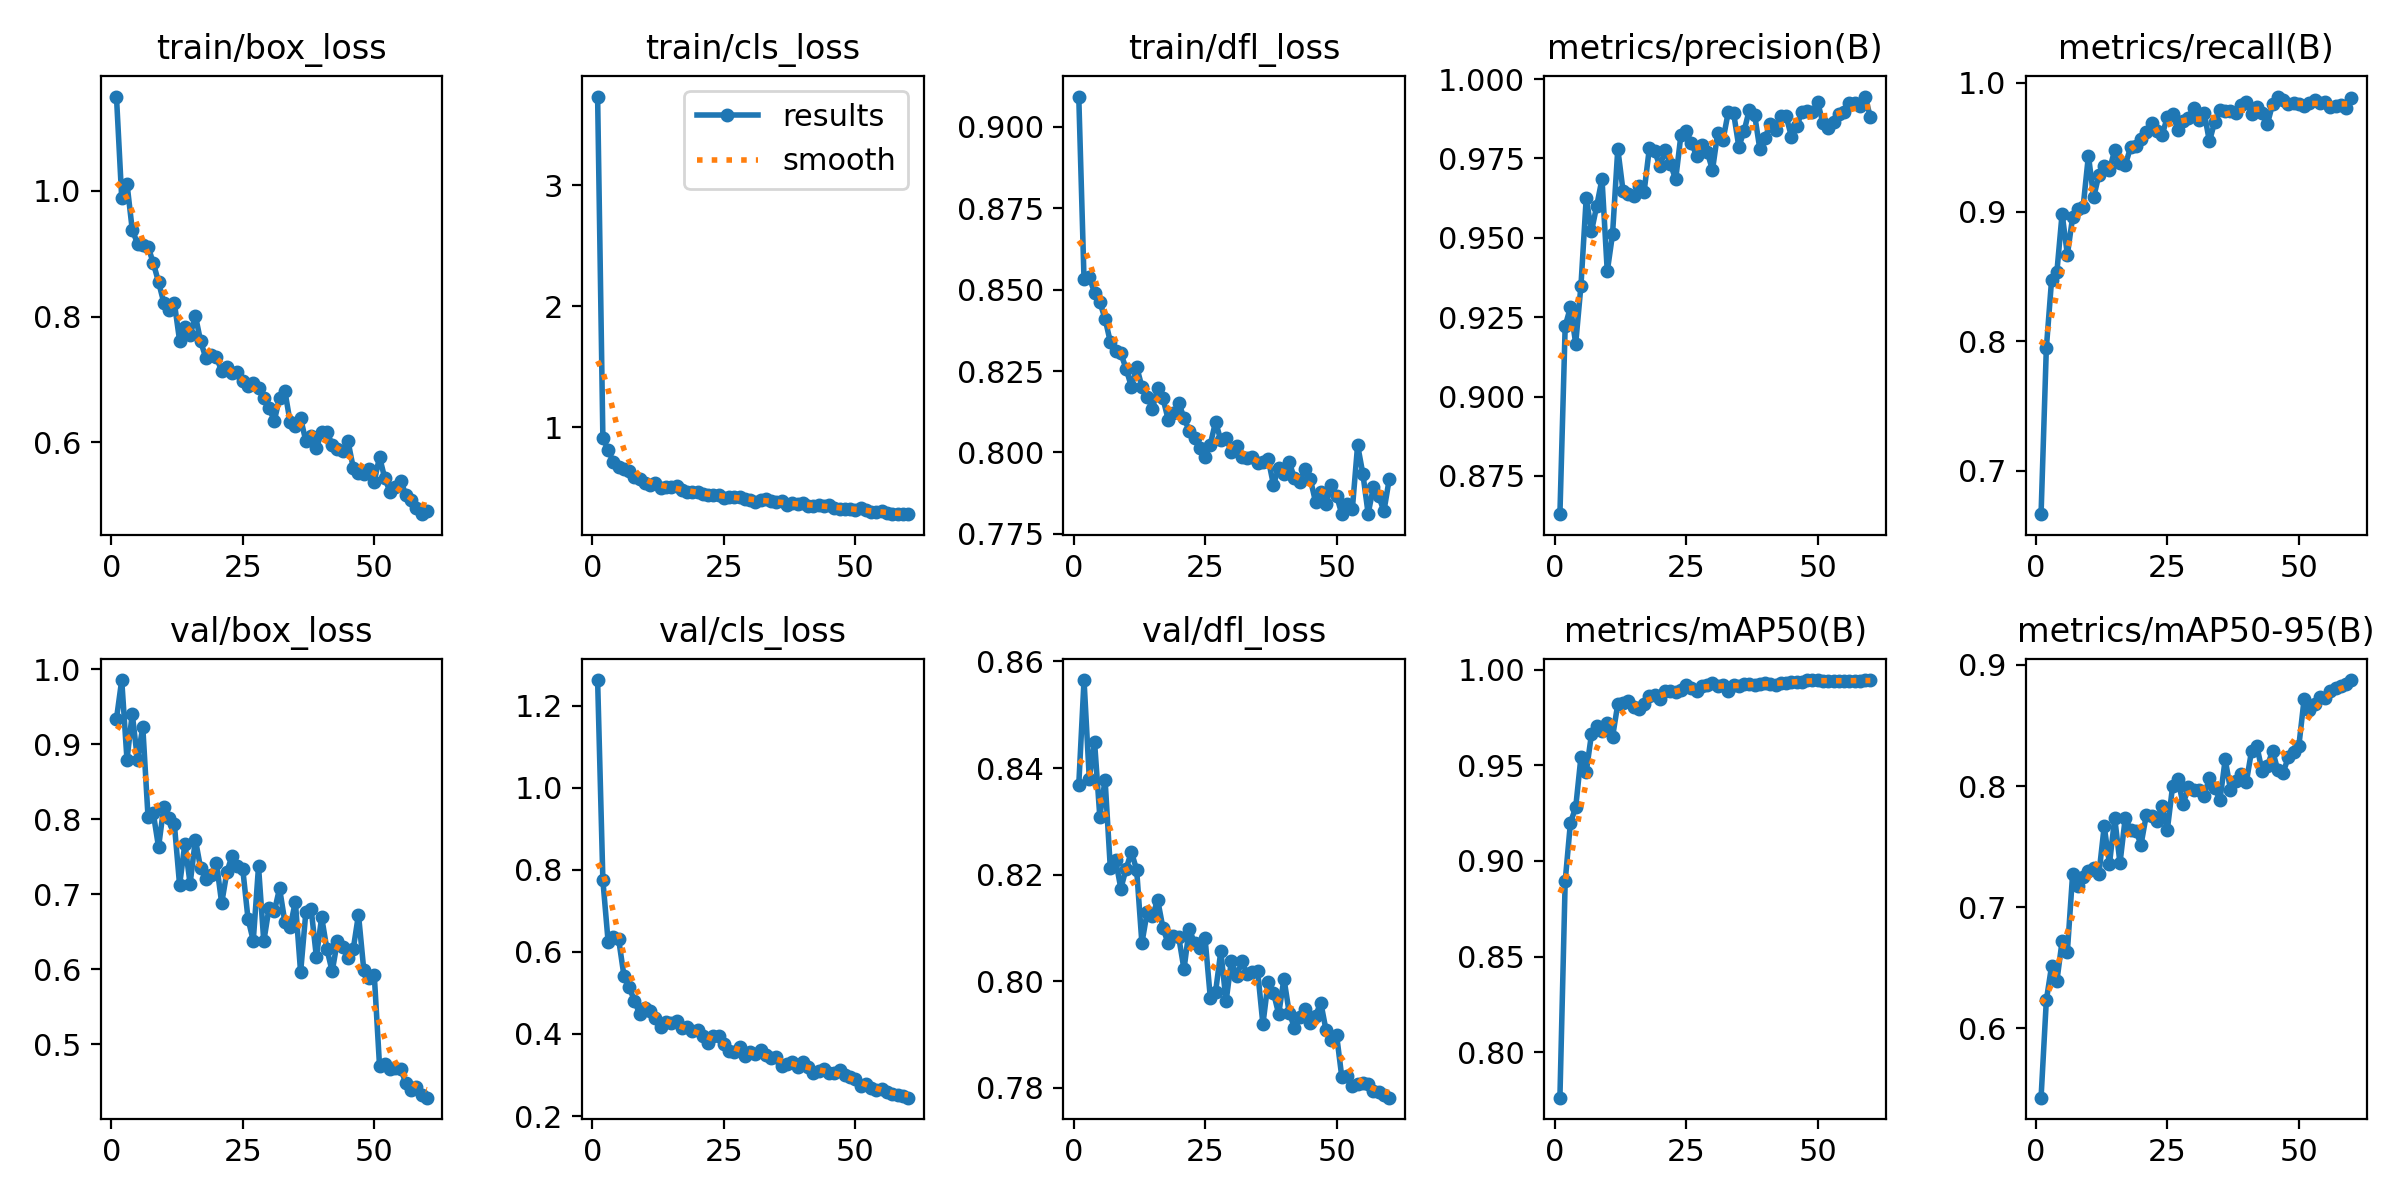

In [18]:
# Display loss matrix
image_path = '/content/runs/detect/train2/results.png'

# Display the image
display(Image(filename=image_path))